[{24: 93.00146698951721, 'way': 'up'}, {24: 93.37740540504456, 'way': 'down'}, {24: 92.83413290977478, 'way': 'combined'}]


<AxesSubplot:>

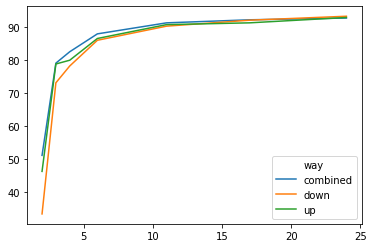

In [17]:
import pandas as pd
import json

with open('results.json') as f:
    df=json.load(f)['DMD']
names={'up':'up','down':'down','weighted':'combined'}
data=dict()
annot=[24,17,11,6,4,3,2]
for n,i in enumerate(['2','3','5','10','20','40','46']):
    data[i]=[]
    for res in df[i]:
        # line={'r':i}
        line={}
        losses=res['losses']
        f_loss=dict()
        way=res['way']
        if way=='both':
            for metric in ['up','down','weighted']:
                line={}
                losses=res['losses']
                f_loss=dict()
                line[annot[n]]=res['dice_'+metric]*100
                # line['hauss']=res['hauss_'+metric]
                # line['asd']=res['asd_'+metric]
                # line['bidir-cons-reg']=losses['bidir-cons-reg']
                # line['bidir-cons-dice']=losses['bidir-cons-dice']
                line['way']=names[metric]
                # del res['losses']
                line.update(f_loss)
                # for i,way in enumerate(['up','down','combined']):
                #     if way==line['way']: line['way']=f'{i}-{way}'
                data[i].append(line)
print(data['2'])
# for i in df.keys():
truc=pd.DataFrame(data['2'])
truc.sort_values('way',ascending=False,inplace=True)

table=truc.groupby(['way'],sort=True).mean()
table
for i in ['3','5','10','20','40','46']:
    if i!='2':
        truc=pd.DataFrame(data[i])
        truc.sort_values('way',ascending=False,inplace=True)

        truc=truc.groupby(['way'],sort=True).mean()
        table=pd.concat([table,truc],axis=1)
table.T.plot()#.to_excel('res_dmd_bidir.xlsx')

